In [30]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import r2_score

In [31]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

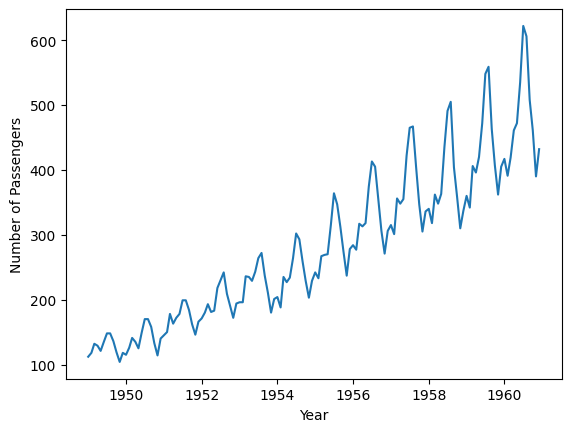

In [32]:
# plot the dataset
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


In [33]:
# split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]


In [34]:
# normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [35]:
# create sequences of data
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

In [36]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
# train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

In [38]:
# evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', train_loss)
print('Test loss:', test_loss)

Train loss: 0.00922707561403513
Test loss: 0.0976412296295166


In [39]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [40]:
# inverse normalize the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

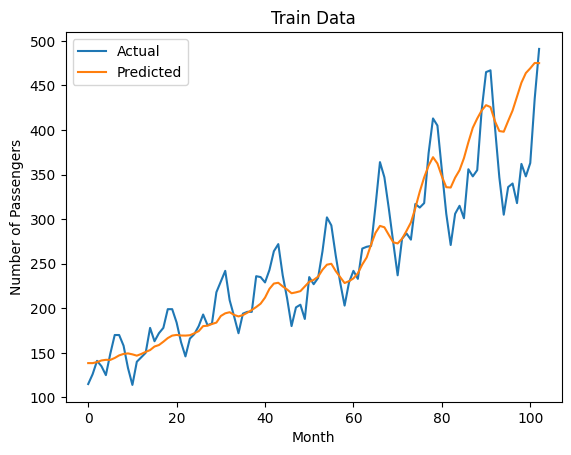

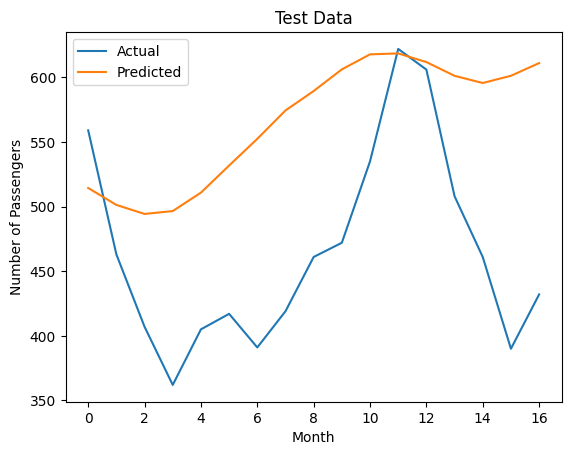

In [41]:
# plot the predictions
plt.plot(y_train)
plt.plot(train_predict)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Train Data')
plt.show()

plt.plot(y_test)
plt.plot(test_predict)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Test Data')
plt.show()


In [42]:
# evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)

# calculate the accuracy
test_predict = model.predict(X_test)
test_accuracy = r2_score(y_test, test_predict)

# print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


1/1 [==============================] - 0s 37ms/step
Test loss: 220931.546875
Test accuracy: -38.79418671024546
